**Installing the Datasets Library:**

In [1]:
# This command installs the 'datasets' library, which provides easy access to datasets for training and evaluation.

!pip install datasets  # Installs the 'datasets' library for working with machine learning datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

**Loading the Dataset abd Review Few Rows:**

In [2]:
# This block of code loads a healthcare dataset stored in a CSV file and displays the first few rows for inspection.

import pandas as pd  # Importing pandas library to work with data frames

# Load the Punjabi dataset
file_path = "/content/updated_result_with_AI_PUNJABI.csv"  # Path to the dataset CSV file
df = pd.read_csv(file_path)  # Reading the dataset from the file and storing it in a pandas DataFrame

# Check the first few rows
print(df.head())  # Display the first 5 rows of the dataset to get an overview of the data

   patient_id  age gender                            Diagnosis  \
0        1049   62    ਮਰਦ        ਖੱਬੀ ਕਮਰ ਦਾ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ   
1        7622   61    ਔਰਤ        ਖੱਬੀ ਕਮਰ ਦਾ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ   
2        8063   59    ਔਰਤ        ਖੱਬੀ ਕਮਰ ਦਾ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ   
3        9737   21    ਮਰਦ  ਦੁਵੱਲੇ ਕੁੱਲ੍ਹੇ ਦਾ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ   
4        4318   53    ਮਰਦ  ਦੁਵੱਲੇ ਕੁੱਲ੍ਹੇ ਦਾ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ   

                  Remarks  doctor_id  \
0  ਹੋਰ ਮੁਲਾਂਕਣ ਦੀ ਲੋੜ ਹੈ।       2504   
1   ਰੁਟੀਨ ਜਾਂਚ ਦੀ ਲੋੜ ਹੈ।       5825   
2  ਹੋਰ ਮੁਲਾਂਕਣ ਦੀ ਲੋੜ ਹੈ।       9898   
3   ਰੁਟੀਨ ਜਾਂਚ ਦੀ ਲੋੜ ਹੈ।       3969   
4          ਮਰੀਜ਼ ਸਥਿਰ ਹੈ।       5984   

                                     Patient History  age_group  \
0  ਮਰੀਜ਼ ਖੱਬੇ ਕਮਰ ਵਿੱਚ ਲਗਾਤਾਰ ਦਰਦ ਦੀ ਸ਼ਿਕਾਇਤ ਕਰਦਾ...          4   
1  MRI ਨੇ ਖੱਬੀ ਕਮਰ ਦੇ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ ਦੀ ਪੁਸ਼ਟੀ...          4   
2  ਗਤੀ ਦੀ ਸੀਮਤ ਰੇਂਜ ਦੇ ਨਾਲ ਖੱਬੇ ਕਮਰ ਦੇ ਦਰਦ ਦੀ ਹੌਲ...          3   
3  ਐਮਆਰਆਈ ਦੋਵਾਂ ਕੁੱਲ੍ਹੇ ਵਿੱਚ ਅਵੈਸਕੁਲਰ ਨੈਕਰੋਸਿਸ ਨੂ...          2   
4  ਮਰੀਜ਼ ਦੁਵੱਲੇ ਕਮਰ ਦੇ ਦਰਦ 

**Data Preprocessing: Cleaning and Combining Text Columns:**

In [3]:
import re  # Importing the 're' library for regular expressions to clean the text data.

def clean_column_punjabi(column, default_value="ਕੋਈ ਜਾਣਕਾਰੀ ਨਹੀਂ ਦਿੱਤੀ ਗਈ"):
    column = column.fillna(default_value).astype(str).str.strip()  # Fill missing values with the default and strip whitespaces
    column = column.apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation from the text
    column = column.apply(lambda x: re.sub(r'[^a-zA-Z0-9\u0A00-\u0A7F\s]', '', x))  # Keep only Punjabi characters, numbers, and spaces
    return column  # Return the cleaned column

# Apply preprocessing to relevant columns
df['Pseudonymized_Diagnosis'] = clean_column_punjabi(df['Pseudonymized_Diagnosis'])  # Clean the 'Diagnosis' column
df['Pseudonymized_Patient History'] = clean_column_punjabi(df['Pseudonymized_Patient History'])  # Clean the 'Patient History' column
df['Pseudonymized_symptoms'] = clean_column_punjabi(df['Pseudonymized_symptoms'])  # Clean the 'symptoms' column
df['Pseudonymized_Diagnosis Category'] = clean_column_punjabi(df['Pseudonymized_Diagnosis Category'])  # Clean the 'Diagnosis Category' column

# Combine text columns for model input
df['combined_text'] = df['Pseudonymized_Diagnosis'] + " " + df['Pseudonymized_Patient History'] + " " + df['Pseudonymized_symptoms']  # Concatenate the relevant text columns
df['combined_text'] = df['combined_text'].replace("", "ਕੋਈ ਜਾਣਕਾਰੀ ਨਹੀਂ ਦਿੱਤੀ ਗਈ")  # Replace empty strings with the default value


**Using AI4Bharat IndicBERT to Find Punjabi Synonyms:**

In [4]:
import torch
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# **Step 1: Load the IndicBERT Model and Tokenizer**
model_name = "ai4bharat/IndicNER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# **Step 2: Function to Get Word Embeddings**
def get_embedding(word):
    tokens = tokenizer(word, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

# **Step 3: Compute Similar Words (Using Cosine Similarity)**
def find_similar_words(word, word_list, top_n=3):
    word_emb = get_embedding(word).reshape(1, -1)
    embeddings = np.array([get_embedding(w) for w in word_list])
    similarities = cosine_similarity(word_emb, embeddings).flatten()
    sorted_indices = np.argsort(similarities)[::-1]  # Sort in descending order
    return [word_list[i] for i in sorted_indices[:top_n]]

# **Step 4: Example Usage**
punjabi_words = ["ਦੁੱਖ", "ਸੰਤਾਪ", "ਖੁਸ਼ੀ", "ਹਾਸਾ", "ਕਲੇਸ਼", "ਵਿਜੋ", "ਰੋਣਾ"]  # Example dictionary
word = "ਦੁੱਖ"
synonyms = find_similar_words(word, punjabi_words)
print(f"Synonyms for '{word}': {synonyms}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/667M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at ai4bharat/IndicNER and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Synonyms for 'ਦੁੱਖ': ['ਦੁੱਖ', 'ਖੁਸ਼ੀ', 'ਕਲੇਸ਼']


**Loading the Tokenizer and Model for Sequence Classification:**

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Import the necessary classes from Hugging Face's transformers library

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')  # Load the pre-trained tokenizer for Indic-BERT model
model = AutoModelForSequenceClassification.from_pretrained('ai4bharat/indic-bert', num_labels=6)  # Load the pre-trained Indic-BERT model for sequence classification and set number of labels to 6


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Encoding Target Labels for Classification:**

In [6]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from scikit-learn to encode labels into numeric values

# Encode target labels
label_encoder = LabelEncoder()  # Initialize the LabelEncoder instance
df['target'] = label_encoder.fit_transform(df['Pseudonymized_Diagnosis Category'])  # Fit and transform the 'Diagnosis Category' column into numeric labels and assign it to the 'target' column

# Check encoded labels
print("Encoded Labels:", label_encoder.classes_)  # Print the classes/labels of the encoded target to verify the transformation




Encoded Labels: ['ਅਗਆਤ' 'ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ' 'ਮਸਕਲਸਕਲਟORGREPLACEMENTਕਰ' 'ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ'
 'ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ' 'ਹਰ']


**Splitting and Preparing Dataset for Model Training:**

In [7]:
# **Splitting and Preparing Dataset for Model Training**

from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn to split the dataset into training and validation sets
from datasets import Dataset  # Import Dataset from Hugging Face's datasets library to easily handle datasets

# Split dataset into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['combined_text'], df['target'], test_size=0.2, random_state=42  # Split the combined_text and target columns into training (80%) and validation (20%) sets
)

# Tokenize the text
def tokenize_function(texts):  # Define a function to tokenize texts
    return tokenizer(texts.tolist(), padding="max_length", truncation=True, max_length=512)  # Tokenize the input texts, padding them to the max length of 512 and truncating longer texts

train_encodings = tokenize_function(train_texts)  # Tokenize the training texts
val_encodings = tokenize_function(val_texts)  # Tokenize the validation texts

# Prepare datasets
train_dataset = Dataset.from_dict({  # Create the train dataset from the tokenized training data
    'input_ids': train_encodings['input_ids'],  # Assign tokenized input IDs
    'attention_mask': train_encodings['attention_mask'],  # Assign attention masks for tokenization
    'labels': train_labels.tolist()  # Assign the target labels as 'labels' for the training dataset
})

val_dataset = Dataset.from_dict({  # Create the validation dataset from the tokenized validation data
    'input_ids': val_encodings['input_ids'],  # Assign tokenized input IDs
    'attention_mask': val_encodings['attention_mask'],  # Assign attention masks for tokenization
    'labels': val_labels.tolist()  # Assign the target labels as 'labels' for the validation dataset
})

**Computing Class Weights for Imbalanced Classes:**

In [8]:
from sklearn.utils.class_weight import compute_class_weight  # Import compute_class_weight from scikit-learn to calculate class weights for imbalanced classes
import numpy as np  # Import NumPy for numerical operations
import torch  # Import PyTorch for tensor operations

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",  # Set class_weight to "balanced" to automatically adjust weights based on class distribution
    classes=np.unique(df['target']),  # Get the unique classes (target labels) from the dataset
    y=df['target']  # Use the target labels to calculate the class weights
)
class_weights = torch.tensor(class_weights, dtype=torch.float)  # Convert the computed class weights into a PyTorch tensor with float data type



**Model Training with Custom Weighted Loss:**

In [9]:
from transformers import TrainingArguments, Trainer  # Import TrainingArguments and Trainer from Hugging Face for training the model

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save the model's output (checkpoints, predictions, etc.)
    eval_strategy="epoch",  # Evaluation strategy to be applied after each epoch
    save_strategy="epoch",  # Save model checkpoint after each epoch
    learning_rate=5e-5,  # Learning rate for the optimizer
    per_device_train_batch_size=8,  # Batch size for training per device
    per_device_eval_batch_size=8,  # Batch size for evaluation per device
    num_train_epochs=5,  # Number of epochs to train the model
    weight_decay=0.01,  # Weight decay for regularization to prevent overfitting
    logging_dir="./logs",  # Directory to save logs for tracking the training process
    report_to="none"  # Disable logging to `wandb` and other services (set to "none")
)

# Define custom trainer for weighted loss (if using class weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs['labels']  # Get the labels from the input
        outputs = model(**inputs)  # Pass the inputs to the model
        logits = outputs.logits  # Get the predicted logits (model outputs)
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Define loss function with class weights for imbalanced classes
        loss = loss_fn(logits, labels)  # Compute the loss between predicted logits and actual labels
        return (loss, outputs) if return_outputs else loss  # Return loss and outputs if requested, else return only loss

# Initialize trainer
trainer = WeightedTrainer(
    model=model,  # The model to train
    args=training_args,  # The training arguments (parameters)
    train_dataset=train_dataset,  # The training dataset
    eval_dataset=val_dataset,  # The validation dataset
    tokenizer=tokenizer  # The tokenizer to encode the texts
)

# Train the model
trainer.train()  # Start training the model with the defined parameters


<ipython-input-9-2d2aa9a4def6>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.564369
2,No log,0.227057
3,0.440800,0.271589
4,0.440800,0.217553
5,0.060000,0.238069


TrainOutput(global_step=1095, training_loss=0.23320786288884132, metrics={'train_runtime': 860.4983, 'train_samples_per_second': 10.139, 'train_steps_per_second': 1.273, 'total_flos': 208593384499200.0, 'train_loss': 0.23320786288884132, 'epoch': 5.0})

**Classification Report:**

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Define human-readable label names corresponding to their encoded integer values
label_names = [
    'ਅਗਆਤ',  # Unknown
    'ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ',  # Back-related disorder
    'ਮਸਕਲਸਕਲਟਲ ਵਕਰ',  # Musculoskeletal disorder
    'ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ',  # Spinal bone disorder
    'ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ',  # Bone-related disorder
    'ਹਰ'  # Other
]

# Get predictions on the validation set
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)  # Get predicted class labels
true_labels = val_dataset['labels']  # True labels

# Ensure the number of labels in the classification report matches the number of classes
labels_range = list(range(len(label_names)))

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
classification_rep = classification_report(
    true_labels, predicted_labels, target_names=label_names, labels=labels_range, zero_division=0
)

# Print classification report
print("Classification Report:")
print(classification_rep)






Classification Report:
                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       256
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       0.95      1.00      0.98        84
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      0.89      0.94         9
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       0.98      1.00      0.99        48
             ਹਰ       1.00      0.90      0.95        40

       accuracy                           0.99       437
      macro avg       0.82      0.80      0.81       437
   weighted avg       0.99      0.99      0.99       437



**Confusion Matrix Plot:**

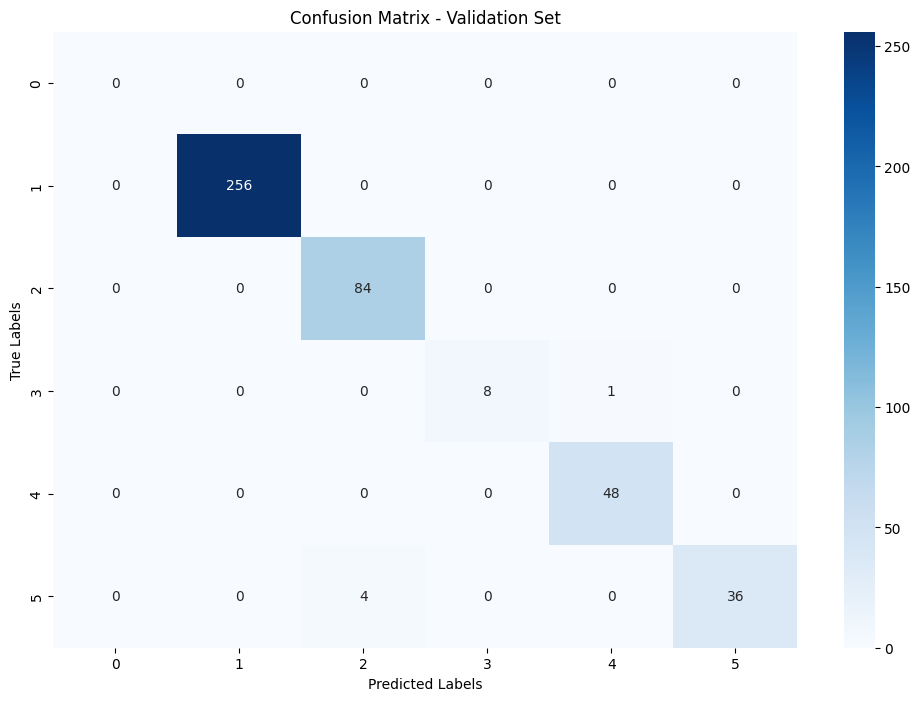

In [11]:
# Calculate confusion matrix with explicit labels to include all classes
cm = confusion_matrix(true_labels, predicted_labels, labels=labels_range)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(
    cm,
    annot=True,  # Annotate each cell with the corresponding count
    fmt='d',  # Integer format for counts
    cmap='Blues',  # Color map
    xticklabels=labels_range,  # Label x-axis with numeric indices 0, 1, 2, 3, 4, 5
    yticklabels=labels_range  # Label y-axis with numeric indices 0, 1, 2, 3, 4, 5
)
plt.title('Confusion Matrix - Validation Set')  # Set plot title
plt.xlabel('Predicted Labels')  # Label for x-axis
plt.ylabel('True Labels')  # Label for y-axis
plt.show()  # Display the confusion matrix

**Train and Evaluate Model with k-5 Fold Validation And Display Result:**

In [13]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold  # For stratified k-fold cross-validation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix  # For evaluation metrics
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhanced data visualization
import numpy as np  # For numerical operations
import torch  # For PyTorch operations
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification  # Transformers utilities
from datasets import Dataset  # For dataset creation



# Load pre-trained Indic-BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')

# Load pre-trained Indic-BERT model for sequence classification with six labels
model = AutoModelForSequenceClassification.from_pretrained('ai4bharat/indic-bert', num_labels=6)

# Extract text data and labels from the DataFrame (ensure 'df' is already defined)
train_texts = df['combined_text']  # Input texts for training
train_labels = df['target']  # Target labels for classification

# Check if the 'combined_text' column exists; if not, create it by concatenating other relevant columns
if 'combined_text' not in df.columns:
    df['combined_text'] = df['Diagnosis'] + " " + df['Patient History'] + " " + df['symptoms']
    print("combined_text column created.")  # Notify that the column has been added

# Function to tokenize the input texts for the model
def tokenize_function(texts):
    return tokenizer(texts.tolist(), padding="max_length", truncation=True, max_length=512)

# Define human-readable label names corresponding to their encoded integer values
label_names = [
    'ਅਗਆਤ',  # Unknown
    'ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ',  # Back-related disorder
    'ਮਸਕਲਸਕਲਟਲ ਵਕਰ',  # Musculoskeletal disorder
    'ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ',  # Spinal bone disorder
    'ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ',  # Bone-related disorder
    'ਹਰ'  # Other
]

# Set up stratified k-fold cross-validation with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store results for each fold
fold_results = []

# Start cross-validation loop
for fold, (train_index, val_index) in enumerate(skf.split(train_texts, train_labels)):
    print(f"***** Fold {fold + 1} *****")  # Display current fold number

    # Split the data into training and validation sets for the current fold
    train_texts_fold = train_texts.iloc[train_index]
    val_texts_fold = train_texts.iloc[val_index]
    train_labels_fold = train_labels.iloc[train_index]
    val_labels_fold = train_labels.iloc[val_index]

    # Tokenize the training and validation texts
    train_encodings = tokenize_function(train_texts_fold)
    val_encodings = tokenize_function(val_texts_fold)

    # Convert the tokenized data into a Dataset format suitable for the Trainer API
    train_dataset = Dataset.from_dict({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask'],
        'labels': train_labels_fold.tolist()
    })
    val_dataset = Dataset.from_dict({
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask'],
        'labels': val_labels_fold.tolist()
    })

    # Set training arguments for the current fold
    training_args = TrainingArguments(
        output_dir=f"./results_fold{fold + 1}",  # Directory for saving fold-specific outputs
        eval_strategy="epoch",  # Evaluate the model after every epoch
        save_strategy="epoch",  # Save the model after every epoch
        learning_rate=5e-5,  # Learning rate for optimization
        per_device_train_batch_size=8,  # Training batch size
        per_device_eval_batch_size=8,  # Evaluation batch size
        num_train_epochs=5,  # Number of epochs to train
        weight_decay=0.01,  # Weight decay to prevent overfitting
        logging_dir=f"./logs_fold{fold + 1}",  # Directory for storing logs
        report_to="none",  # Disable reporting to external services (e.g., WandB)
    )

    # Define a custom Trainer class to compute weighted loss
    class WeightedTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
            labels = inputs['labels']  # Extract labels from inputs
            outputs = model(**inputs)  # Get model outputs
            logits = outputs.logits  # Extract logits from outputs
            loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Define weighted loss function
            loss = loss_fn(logits, labels)  # Compute loss
            return (loss, outputs) if return_outputs else loss  # Return loss and outputs if specified

        def _save(self, output_dir=None, state_dict=None):
            """
            Save model state with contiguous tensors to avoid issues with non-contiguous tensors.
            """
            if state_dict is None:
                state_dict = self.model.state_dict()  # Get model state dictionary

            # Ensure all tensors in the state dictionary are contiguous
            for key, value in state_dict.items():
                if isinstance(value, torch.Tensor) and not value.is_contiguous():
                    state_dict[key] = value.contiguous()

            super()._save(output_dir=output_dir, state_dict=state_dict)  # Call parent class save method

    # Initialize the Trainer with model, arguments, datasets, and tokenizer
    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
    )

    # Train the model for the current fold
    trainer.train()

    # Evaluate the model on the validation set
    eval_result = trainer.evaluate()

    # Get predictions on the validation set
    predictions = trainer.predict(val_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)  # Get predicted class labels


    # Calculate accuracy and weighted F1 score for the current fold
    accuracy = accuracy_score(val_labels_fold, predicted_labels)
    f1 = f1_score(val_labels_fold, predicted_labels, average='weighted')
    train_loss = eval_result["eval_loss"]  # Training loss
    val_loss = eval_result["eval_loss"]  # Validation loss

    # Append fold-specific results to the results list
    fold_results.append({
        "fold": fold + 1,  # Current fold number
        "accuracy": accuracy,  # Accuracy for the fold
        "f1": f1,  # F1 score for the fold
        "classification_report": classification_report(
            val_labels_fold, predicted_labels, target_names=label_names, labels=range(len(label_names)), zero_division=0
        ),
        "confusion_matrix": confusion_matrix(val_labels_fold, predicted_labels, labels=range(len(label_names)))
    })

    # Print training and validation metrics
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report for Fold {fold + 1}:\n")
    print(fold_results[-1]["classification_report"])

    # Plot and display the confusion matrix
    #cm = fold_results[-1]["confusion_matrix"]
    #plt.figure(figsize=(10, 8))  # Set figure size
    #sns.heatmap(
       # cm,
        #annot=True,
       # fmt='d',
       # cmap='Blues',
       # xticklabels=range(len(label_names)),  # Label x-axis with class indices
        #yticklabels=range(len(label_names))  # Label y-axis with class indices
    #)
    #plt.title(f'Confusion Matrix - Fold {fold + 1}')  # Set plot title
    #plt.xlabel('Predicted Labels')  # Label for x-axis
   # plt.ylabel('Actual Labels')  # Label for y-axis
   # plt.show()  # Display the confusion matrix




Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


***** Fold 1 *****


<ipython-input-13-2e32ba2e79fd>:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.088130
2,No log,0.041168
3,0.389700,0.028166
4,0.389700,0.027207
5,0.085700,0.024595


Training Loss: 0.0246
Validation Loss: 0.0246
Accuracy: 0.9931
F1 Score: 0.9930
Classification Report for Fold 1:

                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       252
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       0.98      1.00      0.99        79
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      1.00      1.00         7
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       0.98      1.00      0.99        60
             ਹਰ       1.00      0.92      0.96        39

       accuracy                           0.99       437
      macro avg       0.83      0.82      0.82       437
   weighted avg       0.99      0.99      0.99       437

***** Fold 2 *****


<ipython-input-13-2e32ba2e79fd>:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.104456
2,No log,0.080820
3,0.129400,0.088693
4,0.129400,0.085823
5,0.038200,0.084159


Training Loss: 0.0842
Validation Loss: 0.0842
Accuracy: 0.9954
F1 Score: 0.9953
Classification Report for Fold 2:

                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       252
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       0.99      1.00      0.99        79
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      0.86      0.92         7
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       0.98      1.00      0.99        60
             ਹਰ       1.00      0.97      0.99        39

       accuracy                           1.00       437
      macro avg       0.83      0.81      0.82       437
   weighted avg       1.00      1.00      1.00       437

***** Fold 3 *****


<ipython-input-13-2e32ba2e79fd>:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.013293
2,No log,0.010130
3,0.173000,0.017924
4,0.173000,0.000345
5,0.096500,0.014932


Training Loss: 0.0149
Validation Loss: 0.0149
Accuracy: 0.9977
F1 Score: 0.9977
Classification Report for Fold 3:

                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       252
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       1.00      0.99      0.99        79
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      1.00      1.00         6
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00        60
             ਹਰ       0.97      1.00      0.99        39

       accuracy                           1.00       436
      macro avg       0.83      0.83      0.83       436
   weighted avg       1.00      1.00      1.00       436

***** Fold 4 *****


<ipython-input-13-2e32ba2e79fd>:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.100005
2,No log,0.193219
3,0.133900,0.192414
4,0.133900,0.186708
5,0.043100,0.191844


Training Loss: 0.1918
Validation Loss: 0.1918
Accuracy: 0.9977
F1 Score: 0.9966
Classification Report for Fold 4:

                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         1
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       251
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       1.00      1.00      1.00        80
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      1.00      1.00         7
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00        59
             ਹਰ       0.97      1.00      0.99        38

       accuracy                           1.00       436
      macro avg       0.83      0.83      0.83       436
   weighted avg       1.00      1.00      1.00       436

***** Fold 5 *****


<ipython-input-13-2e32ba2e79fd>:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.043276
2,No log,0.021765
3,0.142800,0.055294
4,0.142800,0.052531
5,0.051100,0.051319


Training Loss: 0.0513
Validation Loss: 0.0513
Accuracy: 0.9954
F1 Score: 0.9954
Classification Report for Fold 5:

                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       251
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       0.98      1.00      0.99        80
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      1.00      1.00         7
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00        60
             ਹਰ       1.00      0.95      0.97        38

       accuracy                           1.00       436
      macro avg       0.83      0.82      0.83       436
   weighted avg       1.00      1.00      1.00       436




**Classification Report With Average Accuracy:**

In [14]:
import numpy as np

# Define human-readable label names corresponding to their encoded integer values
label_names = [
    'ਅਗਆਤ',  # Unknown
    'ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ',  # Back-related disorder
    'ਮਸਕਲਸਕਲਟਲ ਵਕਰ',  # Musculoskeletal disorder
    'ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ',  # Spinal bone disorder
    'ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ',  # Bone-related disorder
    'ਹਰ'  # Other
]

# Assume `fold_results` is a list of dictionaries containing fold-specific metrics
# Each entry contains a confusion matrix, accuracy, and classification report
# Example structure:
# fold_results = [
#     {
#         "classification_report": classification_report(y_true, y_pred, target_names=label_names, zero_division=0),
#         "accuracy": accuracy_score(y_true, y_pred),
#         "confusion_matrix": confusion_matrix(y_true, y_pred, labels=range(len(label_names)))
#     },
#     ...
# ]

# Optional: Print classification reports for each fold
for fold, result in enumerate(fold_results):
    print(f"Classification Report for Fold {fold + 1}")
    print(result["classification_report"])  # Includes human-readable labels

# Summarize results across all folds
accuracies = [result["accuracy"] for result in fold_results]

print("\nSummary Across Folds:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")  # Mean ± Std Dev of Accuracy


Classification Report for Fold 1
                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       252
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       0.98      1.00      0.99        79
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      1.00      1.00         7
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       0.98      1.00      0.99        60
             ਹਰ       1.00      0.92      0.96        39

       accuracy                           0.99       437
      macro avg       0.83      0.82      0.82       437
   weighted avg       0.99      0.99      0.99       437

Classification Report for Fold 2
                 precision    recall  f1-score   support

           ਅਗਆਤ       0.00      0.00      0.00         0
ਕਮਰ ਨਲ ਸਬਧਤ ਵਕਰ       1.00      1.00      1.00       252
  ਮਸਕਲਸਕਲਟਲ ਵਕਰ       0.99      1.00      0.99        79
 ਰੜਹ ਦ ਹਡ ਦ ਵਕਰ       1.00      0.86      0.92         7
ਹਡਆ ਨਲ ਸਬਧਤ ਵਕਰ       0.98      1.00      0.99        60
             ਹਰ   

**Confusion Matrix Plot:**

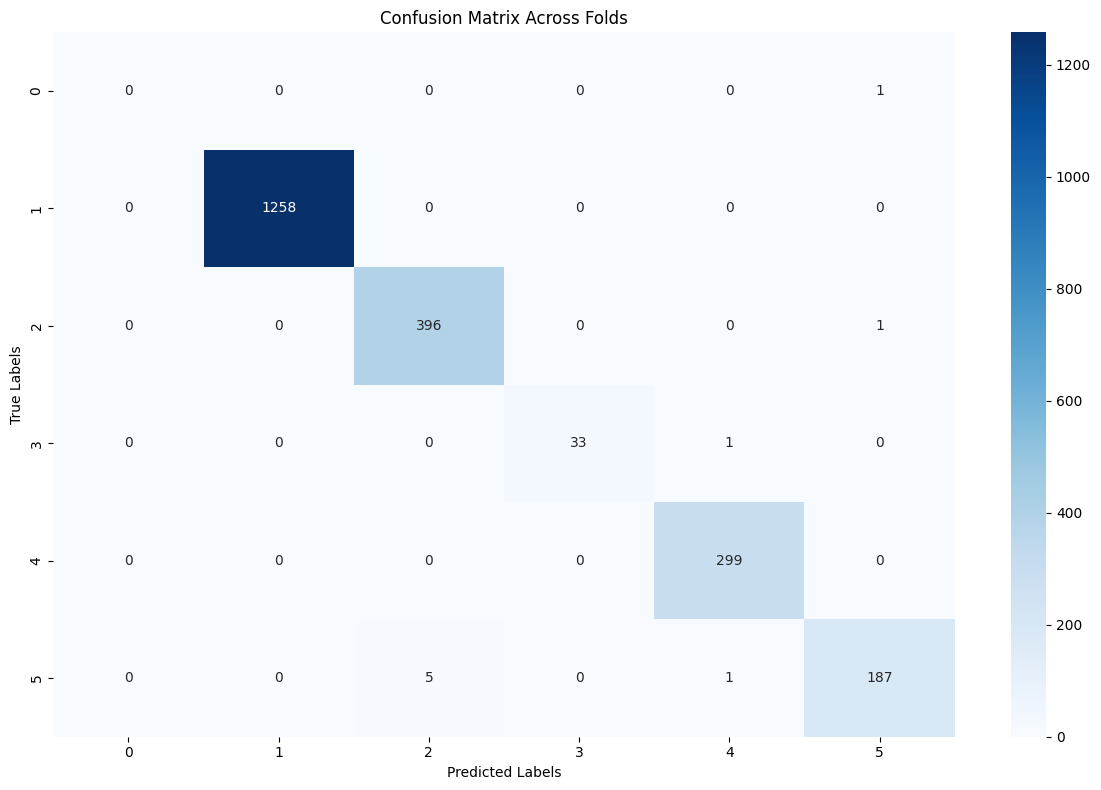

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming `fold_results` is a list of dictionaries containing confusion matrices for each fold
# Example structure:
# fold_results = [
#     {"confusion_matrix": cm_fold_1},
#     {"confusion_matrix": cm_fold_2},
#     ...
# ]

# Define the label range (0-5)
labels_range = list(range(6))  # Assuming 6 classes with numeric labels 0, 1, 2, 3, 4, 5

# Initialize a matrix to accumulate the confusion matrices
summed_cm = np.zeros((len(labels_range), len(labels_range)), dtype=int)

# Accumulate confusion matrices from each fold
for result in fold_results:
    summed_cm += np.array(result["confusion_matrix"])  # Add each fold's confusion matrix

# Plot the summed-up confusion matrix
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(
    summed_cm,
    annot=True,  # Annotate each cell with the corresponding value
    fmt='d',  # Integer format for summed values
    cmap='Blues',  # Color map
    xticklabels=labels_range,  # Numeric labels 0-5 for x-axis
    yticklabels=labels_range  # Numeric labels 0-5 for y-axis
)
plt.title( 'Confusion Matrix Across Folds')  # Set plot title
plt.xlabel('Predicted Labels')  # Label for x-axis
plt.ylabel('True Labels')  # Label for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the heatmap


**Advanced Prediction Function with Hierarchical Logic:**

In [16]:
import torch  # Import PyTorch, a deep learning framework, used for creating and training neural networks

from transformers import AutoTokenizer, AutoModelForSequenceClassification
# Import `AutoTokenizer` and `AutoModelForSequenceClassification` from the Hugging Face Transformers library:
# - `AutoTokenizer`: Automatically loads the tokenizer associated with a specific pre-trained model.
# - `AutoModelForSequenceClassification`: Loads a pre-trained model for sequence classification tasks.

# Function to get synonyms
def get_synonyms(words):
    # Placeholder function. Replace with an actual synonym-fetching mechanism.
    return list(set(words))  # Remove duplicates by converting to a set and back to list

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)

# Set device for model (using GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define correct class labels for predictions
class_labels = {
    0: "ਅਗਆਤ",  # Unknown
    1: "ਕਮਰ ਨਾਲ ਸਬੰਧਤ ਵਕਰ",  # Hip-related disorders
    2: "ਮਸਕਲਸਕਲਟਲ ਵਕਰ",  # Musculoskeletal disorders
    3: "ਰੜ੍ਹੀ ਦੀ ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਵਕਰ",  # Spine-related disorders
    4: "ਹੱਡੀਆਂ ਨਾਲ ਸਬੰਧਤ ਵਕਰ",  # Bone-related disorders
    5: "ਹਰ"  # Other
}

# Synonyms for spinal (ਰੀੜ੍ਹੀ ਦੀ ਹੱਡੀ) related terms
ਰੀੜ੍ਹੀ_keywords = get_synonyms([
    "ਰੀੜ੍ਹੀ", "ਮੱਧ ਰੀੜ੍ਹੀ", "ਸਪਾਈਨ", "ਵਰਟੀਬਰਲ", "ਸਪਾਈਨਲ ਡਿਸਕ", "ਸਾਇਟੀਕਾ", "ਰੀੜ੍ਹੀ ਦੀ ਹੱਡੀ",
    "ਥੱਲੇ ਪਿੱਠ", "ਰੀੜ੍ਹੀ ਦਾ ਦਰਦ", "ਨਰਵ ਦਾ ਦਰਦ", "ਪਿੱਠ ਦੀ ਦਬਾਵ", "ਰੀੜ੍ਹੀ ਦੀ ਸਟਿੱਫਨਸ", "ਰੀੜ੍ਹੀ ਦੀ ਖਿੱਚ",
    "ਸਪਾਈਨਲ ਜ਼ਖਮ", "ਸਪਾਈਨਲ ਸਰਜਰੀ", "ਰੀੜ੍ਹੀ ਦੇ ਫਰੈਕਚਰ", "ਰੀੜ੍ਹੀ ਦੀ ਮਾਸਪੇਸ਼ੀ ਦਾ ਦਰਦ", "ਸਪਾਈਨਲ ਔਸਟਿਓਪੋਰੋਸਿਸ",
    "ਪੀਠ ਦਾ ਦਰਦ", "ਰੀੜ੍ਹੀ ਦੀ ਗੁੰਝਲ", "ਸਪਾਈਨਲ ਟਿਊਮਰ", "ਰੀੜ੍ਹੀ ਦੇ ਜੋੜਾਂ ਦਾ ਦਰਦ", "ਗਰਦਨ ਵਿੱਚ ਦਰਦ, ਚੁੱਕਣ-ਮੁੜਨ ਵਿੱਚ ਕਠਿਨਾਈ।",
    "ਕਮਰ ਵਿੱਚ ਦਰਦ, ਪੈਰ ਸੁੰਨ ਹੋ ਜਾਣ, ਹੱਡੀਆਂ ਦੇ ਮੱਧ ਵਿੱਚ ਜਕੜਨ।",
    "ਕਮਰ ਵਿੱਚ ਬੇਅਰਾਮੀ, ਸੀਮਤ ਗਤੀਸ਼ੀਲਤਾ, ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ।",
    "ਪੈਰਾਂ ਵਿੱਚ ਝਨਝਨਾਹਟ, ਕਮਰ ਦੇ ਖੇਤਰ ਵਿੱਚ ਦਰਦ, ਲੰਮੇ ਸਮੇਂ ਤਕ ਖੜ੍ਹੇ ਰਹਿਣ ਤੋਂ ਬਾਅਦ ਅਸੁਵਿਧਾ",
    "ਗਰਦਨ ਵਿੱਚ ਜਕੜਨ, ਸਿਰ ਘੁਮਾਉਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਮਾਸਪੇਸ਼ੀਆਂ ਦੀ ਥਕਾਵਟ।",
    "ਰੀੜ੍ਹ ਦੀ ਹੱਡੀ ਵਿੱਚ ਦਬਾਅ ਮਹਿਸੂਸ ਹੋਣਾ, ਪੈਰਾਂ ਵਿੱਚ ਜਕੜਨ","ਰੀੜ੍ਹੀ ਦੀ ਮਸਕਲ ਖਿੱਚ","ਗਰਦਨ ਦਰਦ","ਗਰਦਨ ਵਿੱਚ ਦਰਦ"
    "ਕਮਰ ਦਰਦ", "ਕਮਰ ਵਿੱਚ ਦਰਦ"
])

# Synonyms for non-spinal (ਗੈਰਰੀੜ੍ਹੀ) body parts
ਗੈਰਰੀੜ੍ਹੀ_keywords = get_synonyms([
    "ਕਲਾਈ", "ਘੁਟਨਾ", "ਟਖਨਾ", "ਕੋਹਣੀ", "ਕੰਧਾ", "ਮਾਸਪੇਸ਼ੀ", "ਨਸ", "ਜਾਂਘ", "ਛਾਤੀ", "ਪੇਟ", "ਪੈਰ ਦੀ ਉੰਗਲ",
    "ਜੋੜਾਂ ਦਾ ਦਰਦ", "ਕੰਧੇ ਦਾ ਜੋੜ", "ਕਲਾਈ ਦਾ ਦਰਦ", "ਮਾਸਪੇਸ਼ੀਆਂ ਦੀਆਂ ਸਮੱਸਿਆਵਾਂ", "ਟੰਗਾਂ ਵਿੱਚ ਦਰਦ",
    "ਕੰਧੇ ਦੀ ਹਿੱਲਚਾਲ", "ਟੰਗਾਂ ਦੀ ਸੂਜਨ", "ਕੋਹਣੀ ਦਾ ਫਰੈਕਚਰ", "ਪੈਰ ਦੀ ਮਾਸਪੇਸ਼ੀ ਦਾ ਦਰਦ"
])

# Synonyms for hip (ਕੂਲ੍ਹਾ) region and associated terms
ਕੂਲ੍ਹੇ_keywords = get_synonyms([
    "ਕੂਲ੍ਹਾ", "ਜਾਂਘ", "ਪੇਲਵਿਕ","ਕਮਰ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ", "ਕੂਲ੍ਹੇ ਦਾ ਦਰਦ", "ਜਾਂਘ ਦਾ ਦਰਦ", "ਸਨਾਇਵਿਕ ਦਰਦ", "ਕੂਲ੍ਹੇ ਦੀ ਮਾਸਪੇਸ਼ੀ",
    "ਕੂਲ੍ਹੇ ਦੇ ਜੋੜਾਂ ਦਾ ਦਰਦ", "ਕੂਲ੍ਹੇ ਦੀ ਸੂਜਨ", "ਪੇਲਵਿਕ ਸਮੱਸਿਆ", "ਜਾਂਘ ਦੀ ਹਿੱਲਚਾਲ","ਨੱਤਾਂ ਵਿੱਚ ਦਰਦ","ਕੂਲ੍ਹੇ ਵਿੱਚ ਦਰਦ", " ਕੂਲ੍ਹੇ ਦੀ ਗਤੀ ਵਿੱਚ ਕਮੀ ","ਕਮਰ ਦੀ ਸੀਮਤ ਹਿਲਜੁਲ", "ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ", "ਕਮਰ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ ","ਕੂਲ੍ਹੇ ਦਾ ਫਰੈਕਚਰ"
])

# Synonyms for bone (ਹੱਡੀ) and fractures
ਹੱਡੀ_keywords = get_synonyms([
    "ਹੱਡੀ", "ਔਸਟਿਓਪੋਰੋਸਿਸ", "ਹੱਡੀ ਦਾ ਦਰਦ", "ਫਰੈਕਚਰ", "ਹੱਡੀ ਦਾ ਟੁੱਟਣਾ", "ਹੱਡੀ ਦੀ ਸਮੱਸਿਆ",
    "ਹੱਡੀ ਦੀ ਸੂਜਨ", "ਬੋਨ ਥਕਾਵਟ", "ਹੱਡੀ ਦੀ ਮਜ਼ਬੂਤੀ", "ਵਿਸਥਾਪਨ", "ਬੋਨ ਕਮਪ੍ਰੈਸ਼ਨ",
    "ਹੱਡੀ ਦੇ ਜੋੜਾਂ ਦਾ ਦਰਦ", "ਹੱਡੀ ਦੇ ਜੋੜਾਂ ਦੀ ਸੂਜਨ", "ਹੱਡੀ ਦੀ ਕਮੀਜੋਰਤਾ"
])

# Synonyms for other conditions (ਹੋਰ)
ਹੋਰ_keywords = get_synonyms([
    "ਬੁਖਾਰ", "ਖੰਘ", "ਗਲੇ ਦੀ ਖਰਾਸ਼", "ਦਸਤ", "ਸਿਰਦਰਦ", "ਥਕਾਵਟ", "ਉਲਟੀ", "ਚੱਕਰ ਆਉਣਾ",
    "ਛਾਤੀ ਦਾ ਦਰਦ", "ਸੂਜਨ", "ਦਰਦ", "ਦਿਮਾਗੀ ਤਣਾਅ", "ਸਨਾਇਸ ਰੁਕਾਵਟ", "ਮੂਡ ਸਵਿੰਗ", "ਨਜ਼ਲੇ ਦੀ ਸਮੱਸਿਆ",
    "ਪਸੀਨਾ", "ਵਾਤਾਵਰਣ ਦਾ ਅਸਰ", "ਅਵਸਾਦ", "ਅਲਰਜੀ", "ਥਕਾਵਟ", "ਹਾਰਟ ਐਟੈਕ","ਆਮ ਬੇਅਰਾਮੀ, ਗਤੀਸ਼ੀਲਤਾ ਦੇ ਮੁੱਦੇ, ਪ੍ਰਭਾਵਿਤ ਖੇਤਰ ਵਿੱਚ ਦਰਦ।",
    "ਜੀਵਨਸ਼ੈਲੀ ਨਾਲ ਸਬੰਧਤ ਥਕਾਵਟ ਅਤੇ ਜਨਰਲ ਕਾਰਜਸ਼ੀਲਤਾ ਦੀ ਕਮੀ।",
    "ਬੁਖਾਰ, ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ ਅਤੇ ਥਕਾਵਟ",
    "ਸਰੀਰਕ ਕਮਜੋਰੀ, ਜੋੜਾਂ ਵਿੱਚ ਸਖ਼ਤੀ, ਅਤੇ ਮਾਸਪੇਸ਼ੀਆਂ ਦੀ ਜਕੜਨ",
    "ਸਰੀਰ ਵਿੱਚ ਅਸੁਵਿਧਾ ਅਤੇ ਜਨਰਲ ਕਾਰਜਸ਼ੀਲਤਾ ਵਿੱਚ ਕਮੀ।", "ਬਲੱਡ ਕਲਾਟਿੰਗ","ਜੀਵਨਸ਼ੈਲੀ ਨਾਲ ਸਬੰਧਤ ਥਕਾਵਟ ਅਤੇ ਜਨਰਲ ਕਾਰਜਸ਼ੀਲਤਾ ਦੀ ਕਮੀ"
])

# Correct spelling function (if needed)
def correct_spelling(text):
    # Add spell correction logic if necessary
    return text  # Placeholder for spell correction

# Prediction logic with refined keyword matching
def predict_dynamic_batch_with_advanced_keywords_punjabi(texts):
    # Step 1: Correct spelling for each input text
    corrected_texts = [correct_spelling(text) for text in texts]

    # Step 2: Tokenize the corrected texts for the model
    inputs = tokenizer(
        corrected_texts,
        return_tensors="pt",
        truncation=True,
        max_length=256,
        padding=True
    ).to(device)

    # Step 3: Get predictions from the model
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_classes = torch.argmax(logits, dim=-1).cpu().numpy()

    # Step 4: Map predictions and refine with keyword logic
    predictions = [class_labels.get(cls, "ਅਣਜਾਣ") for cls in predicted_classes]

    for i, text in enumerate(corrected_texts):
        if any(keyword in text for keyword in ਰੀੜ੍ਹੀ_keywords):
            predictions[i] = "ਰੀੜ੍ਹੀ ਦੀ ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ"
        elif any(keyword in text for keyword in ਕੂਲ੍ਹੇ_keywords):
            predictions[i] = "ਕੂਲ੍ਹੇ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ"
        elif any(keyword in text for keyword in ਹੱਡੀ_keywords):
            predictions[i] = "ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ"
        elif any(keyword in text for keyword in ਗੈਰਰੀੜ੍ਹੀ_keywords):
            predictions[i] = "ਮਸਕੁਲੋਸਕੇਲੇਟਲ ਬਿਮਾਰੀਆਂ"
        elif any(keyword in text for keyword in ਹੋਰ_keywords):
            predictions[i] = "ਹੋਰ"
        else:
            predictions[i] = "ਅਣਜਾਣ"

    return predictions

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Test Samples and Prediction Generation:**

In [17]:
# Sample input data for predictions (Punjabi symptoms)
sample_inputs = [
    "ਕੰਧਿਆਂ ਵਿੱਚ ਦਰਦ, ਹੱਡੀਆਂ ਵਿੱਚ ਕਮਜੋਰੀ, ਹੱਡੀਆਂ ਦੀ ਲਚੀਲੇਪਨ ਦੀ ਕਮੀ।",
    "ਗਰਦਨ ਵਿੱਚ ਦਰਦ, ਚੁੱਕਣ-ਮੁੜਨ ਵਿੱਚ ਕਠਿਨਾਈ।",
    "ਜੋੜਾਂ ਵਿੱਚ ਦਰਦ, ਮਾਸਪੇਸ਼ੀਆਂ ਵਿੱਚ ਥਕਾਵਟ।",
    "ਕਮਰ ਵਿੱਚ ਦਰਦ, ਪੈਰ ਸੁੰਨ ਹੋ ਜਾਣ, ਹੱਡੀਆਂ ਦੇ ਮੱਧ ਵਿੱਚ ਜਕੜਨ।",
    "ਕਮਰ ਵਿੱਚ ਬੇਅਰਾਮੀ, ਸੀਮਤ ਗਤੀਸ਼ੀਲਤਾ, ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕਮਰ ਵਿੱਚ ਘਟੀ ਹੋਈ ਗਤੀ ਸੀਮਾ",
    "ਨੱਤਾਂ ਵਿੱਚ ਦਰਦ, ਕਮਰ ਦੀ ਸੀਮਤ ਹਿਲਜੁਲ, ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕਮਰ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ",
    "ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ, ਕਮਜ਼ੋਰ ਹੱਡੀਆਂ, ਸੀਮਤ ਜੋੜਾਂ ਦੀ ਗਤੀਸ਼ੀਲਤਾ, ਕਮਜ਼ੋਰ ਹੱਡੀਆਂ",
    "ਆਮ ਬੇਅਰਾਮੀ, ਗਤੀਸ਼ੀਲਤਾ ਦੇ ਮੁੱਦੇ, ਪ੍ਰਭਾਵਿਤ ਖੇਤਰ ਵਿੱਚ ਦਰਦ",
    "ਕਮਰ ਵਿੱਚ ਬੇਅਰਾਮੀ, ਸੀਮਤ ਗਤੀਸ਼ੀਲਤਾ, ਭਾਰ ਚੁੱਕਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕਮਰ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ",
    "ਪੈਰਾਂ ਵਿੱਚ ਝਨਝਨਾਹਟ, ਕਮਰ ਦੇ ਖੇਤਰ ਵਿੱਚ ਦਰਦ, ਲੰਮੇ ਸਮੇਂ ਤਕ ਖੜ੍ਹੇ ਰਹਿਣ ਤੋਂ ਬਾਅਦ ਅਸੁਵਿਧਾ।",
    "ਗਰਦਨ ਵਿੱਚ ਜਕੜਨ, ਸਿਰ ਘੁਮਾਉਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਮਾਸਪੇਸ਼ੀਆਂ ਦੀ ਥਕਾਵਟ।",
    "ਹੱਡੀਆਂ ਵਿੱਚ ਨਰਮੀ, ਹੱਡੀਆਂ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ, ਮਿਆਦਾਂ ਦੇ ਦੌਰਾਨ ਦਰਦ।",
    "ਪਿਠ ਵਿੱਚ ਖਿਚਾਅ, ਜੋੜਾਂ ਵਿੱਚ ਸੁਜਨ, ਹਿਲਣ-ਡੁਲਣ ਵਿੱਚ ਕਠਿਨਾਈ।",
    "ਗੋਡਿਆਂ ਵਿੱਚ ਦਰਦ, ਚਲਣ-ਫਿਰਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਭਾਰ ਚੁੱਕਣ ਵਿੱਚ ਅਸਮਰਥਤਾ।",
    # Bone-Related Disorders
    "ਕੰਧਿਆਂ ਵਿੱਚ ਦਰਦ, ਹੱਡੀਆਂ ਵਿੱਚ ਕਮਜੋਰੀ, ਹੱਡੀਆਂ ਦੀ ਲਚੀਲੇਪਨ ਦੀ ਕਮੀ।",
    "ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ, ਕਮਜ਼ੋਰ ਹੱਡੀਆਂ, ਸੀਮਤ ਜੋੜਾਂ ਦੀ ਗਤੀਸ਼ੀਲਤਾ।",
    "ਹੱਡੀਆਂ ਵਿੱਚ ਨਰਮੀ, ਹੱਡੀਆਂ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ, ਮਿਆਦਾਂ ਦੇ ਦੌਰਾਨ ਦਰਦ।",
    "ਹੱਡੀਆਂ ਦੇ ਟੁੱਟਣ ਦੇ ਅਸਰ, ਜਿਨ੍ਹਾਂ ਵਿੱਚ ਦਰਦ ਅਤੇ ਕਮਜੋਰੀ ਮਹਿਸੂਸ ਹੁੰਦੀ ਹੈ।",

    # Spine-Related Disorders
    "ਗਰਦਨ ਵਿੱਚ ਦਰਦ, ਚੁੱਕਣ-ਮੁੜਨ ਵਿੱਚ ਕਠਿਨਾਈ।",
    "ਕਮਰ ਵਿੱਚ ਦਰਦ, ਪੈਰ ਸੁੰਨ ਹੋ ਜਾਣ, ਹੱਡੀਆਂ ਦੇ ਮੱਧ ਵਿੱਚ ਜਕੜਨ।",
    "ਕਮਰ ਵਿੱਚ ਬੇਅਰਾਮੀ, ਸੀਮਤ ਗਤੀਸ਼ੀਲਤਾ, ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ।",
    "ਪੈਰਾਂ ਵਿੱਚ ਝਨਝਨਾਹਟ, ਕਮਰ ਦੇ ਖੇਤਰ ਵਿੱਚ ਦਰਦ, ਲੰਮੇ ਸਮੇਂ ਤਕ ਖੜ੍ਹੇ ਰਹਿਣ ਤੋਂ ਬਾਅਦ ਅਸੁਵਿਧਾ।",
    "ਗਰਦਨ ਵਿੱਚ ਜਕੜਨ, ਸਿਰ ਘੁਮਾਉਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਮਾਸਪੇਸ਼ੀਆਂ ਦੀ ਥਕਾਵਟ।",
    "ਰੀੜ੍ਹ ਦੀ ਹੱਡੀ ਵਿੱਚ ਦਬਾਅ ਮਹਿਸੂਸ ਹੋਣਾ, ਪੈਰਾਂ ਵਿੱਚ ਜਕੜਨ।"


    # Musculoskeletal Disorders
    "ਜੋੜਾਂ ਵਿੱਚ ਦਰਦ, ਮਾਸਪੇਸ਼ੀਆਂ ਵਿੱਚ ਥਕਾਵਟ।",
    "ਪਿਠ ਵਿੱਚ ਖਿਚਾਅ, ਜੋੜਾਂ ਵਿੱਚ ਸੁਜਨ, ਹਿਲਣ-ਡੁਲਣ ਵਿੱਚ ਕਠਿਨਾਈ।",
    "ਮਾਸਪੇਸ਼ੀਆਂ ਵਿੱਚ ਖਿਚਾਅ ਅਤੇ ਜੋੜਾਂ ਦੇ ਆਲੇ-ਦੁਆਲੇ ਸੁਜਨ।",
    "ਗੋਡਿਆਂ ਵਿੱਚ ਦਰਦ, ਚਲਣ-ਫਿਰਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਭਾਰ ਚੁੱਕਣ ਵਿੱਚ ਅਸਮਰਥਤਾ।",
    "ਮਾਸਪੇਸ਼ੀਆਂ ਦੀ ਥਕਾਵਟ, ਪੈਰਾਂ ਦੀ ਹਿਲਜੁਲ ਵਿੱਚ ਮੁਸ਼ਕਲ।",

    # Hip-Related Disorders
    "ਕੂਲ੍ਹੇ ਵਿੱਚ ਦਰਦ, ਭਾਰ ਚੁੱਕਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕੂਲ੍ਹੇ ਦੀ ਗਤੀ ਵਿੱਚ ਕਮੀ।",
    "ਕੂਲ੍ਹੇ ਦੇ ਜੋੜ ਵਿੱਚ ਜਕੜਨ, ਲੰਮੇ ਸਮੇਂ ਤੱਕ ਬੈਠਣ ਤੋਂ ਬਾਅਦ ਦਰਦ।",
    "ਕੂਲ੍ਹੇ ਦੇ ਖੇਤਰ ਵਿੱਚ ਦਰਦ, ਉਠਣ ਅਤੇ ਬੈਠਣ ਵਿੱਚ ਕਠਿਨਾਈ।",
    "ਕੂਲ੍ਹੇ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ, ਕੂਲ੍ਹੇ ਦੀ ਗਤੀ ਵਿੱਚ ਸੀਮਾਵਾਂ।",

    # General/Other Disorders
    "ਆਮ ਬੇਅਰਾਮੀ, ਗਤੀਸ਼ੀਲਤਾ ਦੇ ਮੁੱਦੇ, ਪ੍ਰਭਾਵਿਤ ਖੇਤਰ ਵਿੱਚ ਦਰਦ।",
    "ਜੀਵਨਸ਼ੈਲੀ ਨਾਲ ਸਬੰਧਤ ਥਕਾਵਟ ਅਤੇ ਜਨਰਲ ਕਾਰਜਸ਼ੀਲਤਾ ਦੀ ਕਮੀ।",
    "ਬੁਖਾਰ, ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ ਅਤੇ ਥਕਾਵਟ।",
    "ਸਰੀਰਕ ਕਮਜੋਰੀ, ਜੋੜਾਂ ਵਿੱਚ ਸਖ਼ਤੀ, ਅਤੇ ਮਾਸਪੇਸ਼ੀਆਂ ਦੀ ਜਕੜਨ।",
    "ਸਰੀਰ ਵਿੱਚ ਅਸੁਵਿਧਾ ਅਤੇ ਜਨਰਲ ਕਾਰਜਸ਼ੀਲਤਾ ਵਿੱਚ ਕਮੀ।",


]
# Predict categories for the sample inputs
predictions = predict_dynamic_batch_with_advanced_keywords_punjabi(sample_inputs)

# Display results
for text, category in zip(sample_inputs, predictions):
    print(f"Input: {text}\nPredicted Category: {category}\n")

Input: ਕੰਧਿਆਂ ਵਿੱਚ ਦਰਦ, ਹੱਡੀਆਂ ਵਿੱਚ ਕਮਜੋਰੀ, ਹੱਡੀਆਂ ਦੀ ਲਚੀਲੇਪਨ ਦੀ ਕਮੀ।
Predicted Category: ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਗਰਦਨ ਵਿੱਚ ਦਰਦ, ਚੁੱਕਣ-ਮੁੜਨ ਵਿੱਚ ਕਠਿਨਾਈ।
Predicted Category: ਰੀੜ੍ਹੀ ਦੀ ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਜੋੜਾਂ ਵਿੱਚ ਦਰਦ, ਮਾਸਪੇਸ਼ੀਆਂ ਵਿੱਚ ਥਕਾਵਟ।
Predicted Category: ਮਸਕੁਲੋਸਕੇਲੇਟਲ ਬਿਮਾਰੀਆਂ

Input: ਕਮਰ ਵਿੱਚ ਦਰਦ, ਪੈਰ ਸੁੰਨ ਹੋ ਜਾਣ, ਹੱਡੀਆਂ ਦੇ ਮੱਧ ਵਿੱਚ ਜਕੜਨ।
Predicted Category: ਰੀੜ੍ਹੀ ਦੀ ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਕਮਰ ਵਿੱਚ ਬੇਅਰਾਮੀ, ਸੀਮਤ ਗਤੀਸ਼ੀਲਤਾ, ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕਮਰ ਵਿੱਚ ਘਟੀ ਹੋਈ ਗਤੀ ਸੀਮਾ
Predicted Category: ਕੂਲ੍ਹੇ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਨੱਤਾਂ ਵਿੱਚ ਦਰਦ, ਕਮਰ ਦੀ ਸੀਮਤ ਹਿਲਜੁਲ, ਭਾਰ ਦੇ ਸਮਰਥਨ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕਮਰ ਦੀ ਲਚਕਤਾ ਵਿੱਚ ਕਮੀ
Predicted Category: ਕੂਲ੍ਹੇ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ, ਕਮਜ਼ੋਰ ਹੱਡੀਆਂ, ਸੀਮਤ ਜੋੜਾਂ ਦੀ ਗਤੀਸ਼ੀਲਤਾ, ਕਮਜ਼ੋਰ ਹੱਡੀਆਂ
Predicted Category: ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਆਮ ਬੇਅਰਾਮੀ, ਗਤੀਸ਼ੀਲਤਾ ਦੇ ਮੁੱਦੇ, ਪ੍ਰਭਾਵਿਤ ਖੇਤਰ ਵਿੱਚ ਦਰਦ
Predicted Category: ਹੋਰ

Input: ਕਮਰ ਵਿੱਚ ਬੇਅਰਾਮੀ, ਸੀਮਤ ਗਤੀਸ਼ੀਲਤਾ, ਭਾਰ ਚੁੱਕਣ ਵਿੱਚ ਮੁਸ਼ਕਲ, ਕਮਰ ਦੀ ਲਚਕਤਾ ਵਿੱਚ 

In [18]:
sample_inputs = [" ਮੈਨੂੰ ਬੁਖਾਰ ਤੇ ਖੰਸੀ ਜੁਕਾਮ ਹੈ।",
                " ਮੈਨੂੰ ਬਹੁਤ ਜ਼ਿਆਦਾ ਗਰਦਨ ਤੇ ਕਮਰ ਵਿੱਚ ਦਰਦ ਹੈ।",
                "ਮੇਰੀਆਂ ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ ਹੈ ਅਤੇ ਫ੍ਰੈਕਚਰ ਹੈ।"]
# Predict categories for the sample inputs
predictions = predict_dynamic_batch_with_advanced_keywords_punjabi(sample_inputs)

# Display results
for text, category in zip(sample_inputs, predictions):
    print(f"Input: {text}\nPredicted Category: {category}\n")

Input:  ਮੈਨੂੰ ਬੁਖਾਰ ਤੇ ਖੰਸੀ ਜੁਕਾਮ ਹੈ।
Predicted Category: ਹੋਰ

Input:  ਮੈਨੂੰ ਬਹੁਤ ਜ਼ਿਆਦਾ ਗਰਦਨ ਤੇ ਕਮਰ ਵਿੱਚ ਦਰਦ ਹੈ।
Predicted Category: ਰੀੜ੍ਹੀ ਦੀ ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

Input: ਮੇਰੀਆਂ ਹੱਡੀਆਂ ਵਿੱਚ ਦਰਦ ਹੈ ਅਤੇ ਫ੍ਰੈਕਚਰ ਹੈ।
Predicted Category: ਹੱਡੀ ਨਾਲ ਸੰਬੰਧਤ ਬਿਮਾਰੀਆਂ

